# Tensorflow and Deep Neural Networks

Welcome to the Reinforcement Learning Lab! This is an introductory tutorial for you to familiarize yourself with *TensorFlow*.


In [1]:
import warnings; warnings.filterwarnings("ignore")
import os; os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import tensorflow as tf
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Numerical Optimization

TensorFlow is a framework for the optimization of non-linear function. To perform an optimization task with TensorFlow, there are three foundamental components:
* **Variables:** the variables to optimize, notice that since tensorflow exploits numerical method (i.e., gradient descendt), we must always initialize the variables to an initial value.
* **Optimizer:** the object that apply the gradient to each variable exploiting different optimization techinques (e.g., Adam or SGD)
* **Objective Function:** the function we aim to optimize
In the following example we will find the minimum of the function $(x-3)^2$ and the correspoding assignement for $x$.

1) First, we must initialize the variables of the equation to an initial value *(notice that in our function we have only one variable)*

In [2]:
x = tf.Variable(0.0, name='x')

2) Second, we should instantiate the optimizer; a common choice is Stochastic Gradient Descent.

In [3]:
optimizer = tf.keras.optimizers.SGD( learning_rate=0.001 )

3) Finally, we perform the actual optimization process. The first step is to write the objective function, compute the gradient for each variable, and apply the gradient variable-wise to find the minimum of the function.

In [4]:
pre_optimization_value = x.numpy()

with tf.GradientTape() as tape:
    
    # Write the objective function on the tape
    objective = (x-3)**2

    # Compute the gradient with respect to the given variables
    grad = tape.gradient(objective, [x])

    # Apply the gradient
    optimizer.apply_gradients( zip(grad, [x]) )

4. The numerical nature of gradient descent requires multiple iterations of the algorithm to reach the minimum

In [5]:
for _ in range(5000):    
    
    with tf.GradientTape() as tape:

        # Write the objective function on the tape
        objective = (x-3)**2

        # Compute the gradient with respect to the given variables
        grad = tape.gradient(objective, [x])

        # Apply the gradient
        optimizer.apply_gradients( zip(grad, [x]) )
        
post_optimization_value = x.numpy()

In [6]:
print( f"The initial value of the variable 'x' was: {pre_optimization_value}" )
print( f"The value of 'x' after the optimization process is: {round(post_optimization_value, 2)}" )
print()
print( f"The minimum of the function (x-3)**2 is {round((post_optimization_value-3)**2, 2)} with x={round(post_optimization_value, 2)}" )

The initial value of the variable 'x' was: 0.0
The value of 'x' after the optimization process is: 3.0

The minimum of the function (x-3)**2 is 0.0 with x=3.0


## Multivariable Optimization

Of course, the function $(x-3)^2$ can be easily optimized in closed form. In contrast, TensorFlow is particularly useful when we want to optimize **non-linear**, **complex**, and **multivariable** functions. Suppose, for example, that we want to find the minimum of the following two variable function:

$$ 2x^2 + 3y^2 - 12x - 6y + 9 $$

In [7]:
x = tf.Variable(1.0, name='x')
y = tf.Variable(1.0, name='y')
optimizer = tf.keras.optimizers.SGD( learning_rate=0.001 )

def objective_function( x, y ):
    return 2*x**2 + 3*y**2 - 12*x - 6*y + 9

for _ in range(3000):
    
    with tf.GradientTape() as tape:

        # Write the objective function on the tape
        objective = objective_function(x, y)

        # Compute the gradient with respect to the given variables
        grad = tape.gradient(objective, [x, y])

        # Apply the gradient
        optimizer.apply_gradients( zip(grad, [x, y]) )

print( f"The values for <x, y> that minimize the function are <{round(x.numpy(), 5)}, {round(y.numpy(), 5)}>" )
print( f"The minimum of the function is {round(objective_function(x.numpy(), y.numpy()), 5)}" )

The values for <x, y> that minimize the function are <2.999969959259033, 1.0>
The minimum of the function is -12.0


From the visualization of the function, it is possible to see that the minimum is actually in **<3, 1>**.

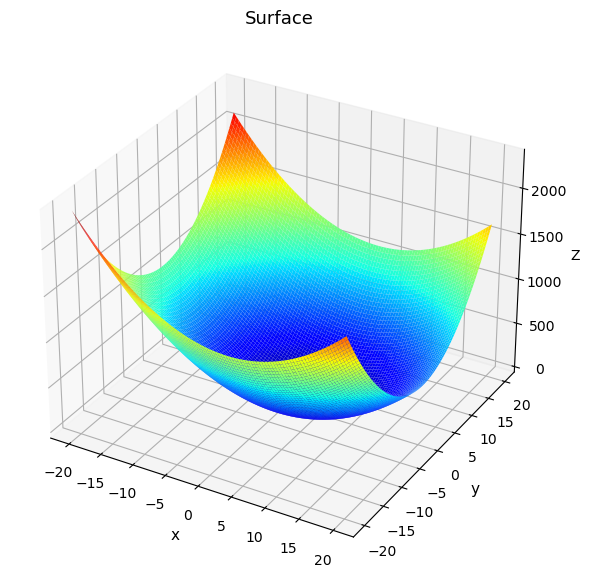

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return 2*x**2 + 3*y**2 - 12*x - 6*y + 9

x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)
fig = plt.figure(figsize = (10,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='jet', edgecolor='none')
ax.set_title("Surface", fontsize = 13)
ax.set_xlabel('x', fontsize = 11)
ax.set_ylabel('y', fontsize = 11)
ax.set_zlabel('Z', fontsize = 10)
plt.savefig("function.png")

## Neural network with Keras
**Keras** is a sub-module of *TensorFlow*; it is an open-source neural-network library written in Python. Designed to enable fast experimentation with deep neural networks, it focuses on being user-friendly, modular, and extensible.

![Network](images/neural_networks.png)

With kears you can easly create a neural network with the **Sequential** module.

In [9]:
input_layer = 3
layer_size = 5
output_layer = 2

model = Sequential()
model.add(Dense(layer_size, input_dim=input_layer, activation="relu")) #input layer + hidden layer #1
model.add(Dense(layer_size, activation="relu")) #hidden layer #2
model.add(Dense(layer_size, activation="relu")) #hidden layer #3
model.add(Dense(layer_size, activation="relu")) #hidden layer #4
model.add(Dense(layer_size, activation="relu")) #hidden layer #5
model.add(Dense(output_layer, activation="linear")) #output layer

In Keras you can compute the output of a network with the **predict** function, that requires in input the values of the input layer nodes and returns the corresponding values of the output layer.

In [10]:
input_network = [np.random.uniform(0, 1), np.random.uniform(0, 1), np.random.uniform(0, 1)]
output_network = model.predict(np.array([input_network]), verbose=0)
print("Input network: {}".format(input_network))
print("network Prediction: {}".format(output_network[0]))

Input network: [0.6423268489982302, 0.8227375546897053, 0.0685541126997109]
network Prediction: [0. 0.]


Finally, remember that for all the methods (*fit*, *predict*, ...) keras requires as input a numpy array of array, for example you must convert your state in the correct **shape**.  Kears will return, in the same way, an array of array, so to extract the corresponding ouutput layer you must select the first element.

In [11]:
state = np.array([2.3, 1.2, 0.4])
# model.predict(input_network) will give you a shape error
state = state.reshape(1, 3)
print("Prediction:", model.predict(state, verbose=0)[0])

Prediction: [ 0.00169756 -0.00166481]


An alternative approach to execute the forward propagation to obtain the tensor is as follows (the results is the same):

In [12]:
print("Prediction:", model(state)[0])

Prediction: tf.Tensor([ 0.00169756 -0.00166481], shape=(2,), dtype=float32)


# DNNs are just (complex) functions!
Deep Neural Networks are just complex, non-linear and multivariable functions that can therefore be optimized with TensorFlow to reach a global minimum. In this context the objective function we aim to minimize is commonly called **loss function**, and the trainable variables that consitutes the neural network function are called **weights** and **biases**.

### Example
Suppose we want to train a neural network to add the two numbers provided in input. The idea is to minimize the difference between the predicted output and the expected value over time, until we find the correct assignement for the weights and biases.

1) First, we create the neural network

In [13]:
input_layer = 2
layer_size = 8
output_layer = 1

model = Sequential()
model.add(Dense(layer_size, input_dim=input_layer, activation="relu")) #input layer + hidden layer #1
model.add(Dense(layer_size, activation="relu")) #hidden layer #2
model.add(Dense(output_layer, activation="linear")) #output layer

2) Second, we define the objective function (i.e., **loss**), given that our problem requires regression, we exploit the MeanSquaredError (MSE) loss. We refer to the official documentation for details ([here](https://keras.io/api/losses/regression_losses/#meansquarederror-class)).

In [14]:
def mse( network, dataset_input, target ):
    
    # Compute the predicted value, over time this value should
    # looks more like to the expected output (i.e., target)
    predicted_value = network( dataset_input )
    
    # Compute MSE between the predicted value and the expected labels
    mse = tf.math.square(predicted_value - target)
    mse = tf.math.reduce_mean(mse)
    
    # Return the averaged values for computational optimization
    return mse

3) Third, we initialize the optimizer and generate the dataset (notice that for DRL, the dataset is automatically generated through the interactions with the environment).

In [15]:
# Instantiate the optimizer; Adam is a standard optimizer that sows excellent results in real-world tasks
optimizer = tf.keras.optimizers.Adam()

# Generating the dataset
dataset_input = np.array([[np.random.randint(0, 10), np.random.randint(0, 10)] for _ in range(1000)]).reshape(-1, 2)
target = np.array([i[0]+i[1] for i in dataset_input]).reshape(-1, 1)

4) Finally, we perform the actual optimization process

In [16]:
custom_input = [7, 14]
print( "\nPre Training Result" )
print( "\tForward Propagation: 7 + 14 =", model(np.array(custom_input).reshape(-1, 2)).numpy()[0][0] )

# Starting the gradient descent process
for _ in range(5000):
    
    with tf.GradientTape() as tape:
        
        # Write the objective function on the tape
        idx = np.random.randint(dataset_input.shape[0], size=128 )
        objective = mse( model, dataset_input[idx], target[idx] )

        # Compute the gradient with respect to the given variables
        grad = tape.gradient(objective, model.trainable_variables )

        # Apply the gradient
        optimizer.apply_gradients( zip(grad, model.trainable_variables) )
        
print( "Post Training Result" )
print( "\tForward Propagation: 7 + 14 =", model(np.array(custom_input).reshape(-1, 2)).numpy()[0][0] )


Pre Training Result
	Forward Propagation: 7 + 14 = -3.178244
Post Training Result
	Forward Propagation: 7 + 14 = 21.108719
